In [ ]:
# @title Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
import nltk

In [ ]:
# @title Load the Data
data = pd.read_csv("/content/movie_review.csv")

In [ ]:
# @title Download NLTK for NLP
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
print(data.head())

   fold_id cv_tag  html_id  sent_id  \
0        0  cv000    29590        0   
1        0  cv000    29590        1   
2        0  cv000    29590        2   
3        0  cv000    29590        3   
4        0  cv000    29590        4   

                                                text  tag  
0  films adapted from comic books have had plenty...  pos  
1  for starters , it was created by alan moore ( ...  pos  
2  to say moore and campbell thoroughly researche...  pos  
3  the book ( or " graphic novel , " if you will ...  pos  
4  in other words , don't dismiss this film becau...  pos  


In [ ]:
# @title Preprocessing the text
def preprocess_text(text):
    text = text.lower()

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stopwords.words('english')]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [ ]:
data['processed_review'] = data['text'].apply(preprocess_text)

In [ ]:
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(data['processed_review'])

In [ ]:
X = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# @title Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
data['cluster'] = clusters

In [ ]:
print(data['cluster'].value_counts())

cluster
1    63710
0      826
2      184
Name: count, dtype: int64


In [ ]:
# @title Principal component analysis
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

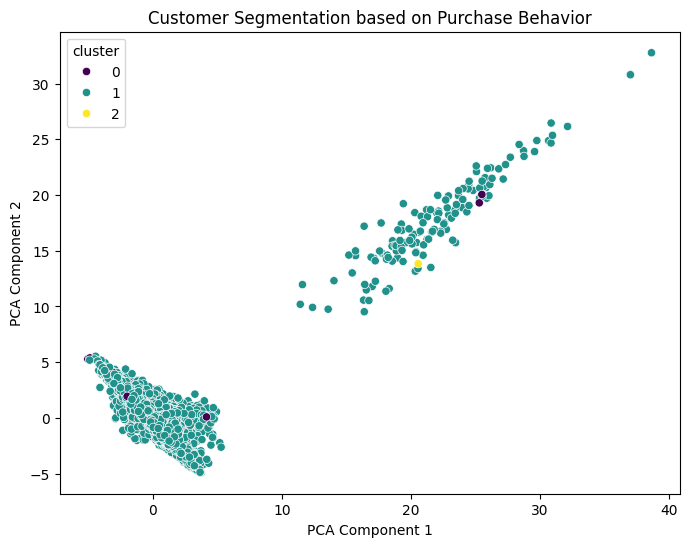

In [ ]:
# @title Visualize the Output
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster'], palette='viridis')
plt.title('Customer Segmentation based on Purchase Behavior')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()